In [2]:
# Setup
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
from matplotlib import rcParams

In [4]:
adata = sc.read_h5ad("merged_cond.h5ad")

In [5]:
import anndata as ad
print(adata)

AnnData object with n_obs × n_vars = 62465 × 14187
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'doublet_score', 'doublet', 'cells', 'sample_ID', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'clusters', 'condition'
    var: 'features'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'


In [6]:
# Explore Anndata
print(adata.obs)

                                    orig.ident  nCount_RNA  nFeature_RNA  \
RV_control_AAACCCACAACCAGAG-1_1  SeuratProject      3303.0          1770   
RV_control_AAACGAAAGCCTTCTC-1_1  SeuratProject      2184.0          1270   
RV_control_AAACGAACACAACGTT-1_1  SeuratProject       675.0           515   
RV_control_AAACGAACACGTGAGA-1_1  SeuratProject      1330.0           866   
RV_control_AAACGAACACTACCGG-1_1  SeuratProject      1635.0           991   
...                                        ...         ...           ...   
LV_CAV_TTTGTTGGTGACTATC-1_10     SeuratProject      3558.0          1850   
LV_CAV_TTTGTTGTCAGAGTGG-1_10     SeuratProject      2178.0          1410   
LV_CAV_TTTGTTGTCCGTAGGC-1_10     SeuratProject      1060.0           791   
LV_CAV_TTTGTTGTCGGTAGGA-1_10     SeuratProject       209.0           191   
LV_CAV_TTTGTTGTCTAGCATG-1_10     SeuratProject      6032.0          3039   

                                 percent.mt  doublet_score  doublet  \
RV_control_AAACC

In [7]:
B=["6460xKAx1", "6460xKAx10", "6460xKAx2", "6460xKAx3", "6460xKAx4", "6460xKAx5", "6460xKAx6", "6460xKAx7", "6460xKAx8", "6460xKAx9"]
cov_df2 = pd.DataFrame({"Cond":["control", "CAV", "control", "CAV", "CAV", "control", "CAV", "CAV", "CAV", "CAV"]}, index=B)
cov_df3 = pd.DataFrame({"Cond":["RV_Control_1", "LV_CAV_1", "RV_Control_2", "RV_CAV_1", "LV_CAV_2", "RV_Control_3", "RV_CAV_2", "RV_CAV_3", "LV_CAV_3", "RV_CAV_4"]}, index=B)
cov_df4 = pd.DataFrame({"Cond":["RV_Control", "LV_CAV", "RV_Control", "RV_CAV", "LV_CAV", "RV_Control", "RV_CAV", "RV_CAV", "LV_CAV", "RV_CAV"]}, index=B)

In [21]:
# Import data from scanpy
data_scanpy = dat.from_scanpy(
adata,
cell_type_identifier = "clusters",
sample_identifier = "sample_ID",
covariate_df = cov_df4
)
print(data_scanpy)

AnnData object with n_obs × n_vars = 10 × 17
    obs: 'Cond'
    var: 'n_cells'


In [9]:
# Exploring scanpy object
data_scanpy

AnnData object with n_obs × n_vars = 10 × 17
    obs: 'Cond'
    var: 'n_cells'

<AxesSubplot:xlabel='Cell type', ylabel='Proportion'>

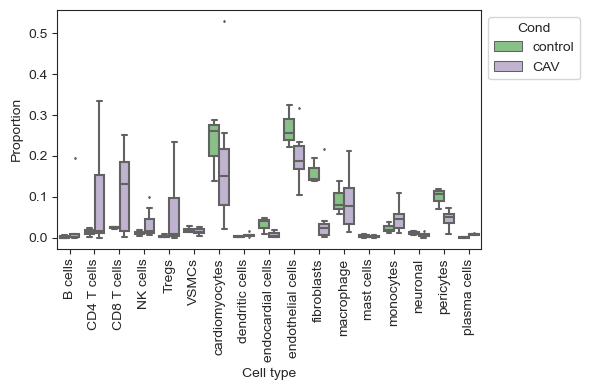

In [10]:
viz.boxplots(data_scanpy, feature_name = "Cond", cmap = "Accent")

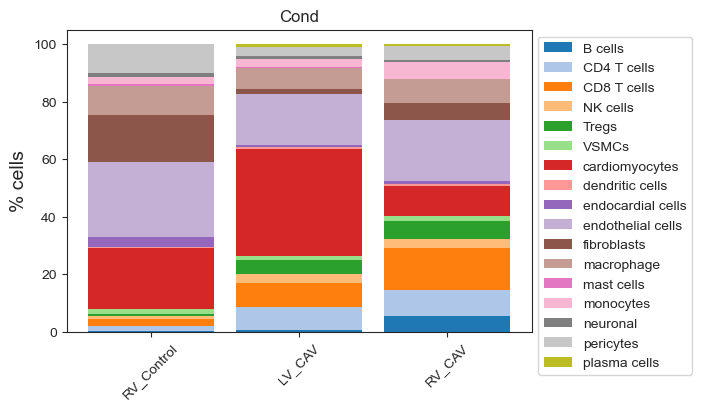

In [22]:
viz.stacked_barplot(data_scanpy, feature_name = "Cond", dpi=100)
pl.ylabel('% cells', fontsize=14)

pl.savefig('test2.tiff', dpi = 300, bbox_inches='tight')
plt.show()

In [22]:
model_all = mod.CompositionalAnalysis(data_scanpy, formula="C(Cond, Treatment('RV_Control'))", reference_cell_type="automatic")
all_results = model_all.sample_hmc()
all_results.summary()

Automatic reference selection! Reference cell type set to plasma cells
Zero counts encountered in data! Added a pseudocount of 0.5.
MCMC sampling finished. (88.555 sec)
Acceptance rate: 52.5%
Compositional Analysis summary:

Data: 10 samples, 17 cell types
Reference index: 16
Formula: C(Cond, Treatment('RV_Control'))

Intercepts:
                   Final Parameter  Expected Sample
Cell Type                                          
B cells                     -1.140       100.069585
CD4 T cells                 -0.311       229.262079
CD8 T cells                  0.047       327.951521
NK cells                    -0.362       217.862863
Tregs                       -0.723       151.845840
VSMCs                       -0.421       205.380796
cardiomyocytes               1.383      1247.461290
dendritic cells             -0.944       121.737343
endocardial cells           -0.671       159.950725
endothelial cells            1.525      1437.794752
fibroblasts                  0.234       395

In [27]:
all_results.set_fdr(est_fdr = 0.1)
print(all_results.credible_effects())

Covariate                             Cell Type        
C(Cond, Treatment('control'))[T.CAV]  B cells              False
                                      CD4 T cells          False
                                      CD8 T cells          False
                                      NK cells             False
                                      Tregs                False
                                      VSMCs                False
                                      cardiomyocytes        True
                                      dendritic cells      False
                                      endocardial cells     True
                                      endothelial cells     True
                                      fibroblasts           True
                                      macrophage            True
                                      mast cells           False
                                      monocytes            False
                                  